# Facet grid

In [1]:

from plotnine import ggplot, aes, geom_point, labs, facet_grid, theme, element_text, element_rect
from plotnine.data import mpg

`facet_grid()` is used to form a grid of plots, where the rows and
columns of the grid are set by the faceting variables. It is useful for
visualising two discrete variables.

In [2]:
mpg.head()

Basic scatter plot:

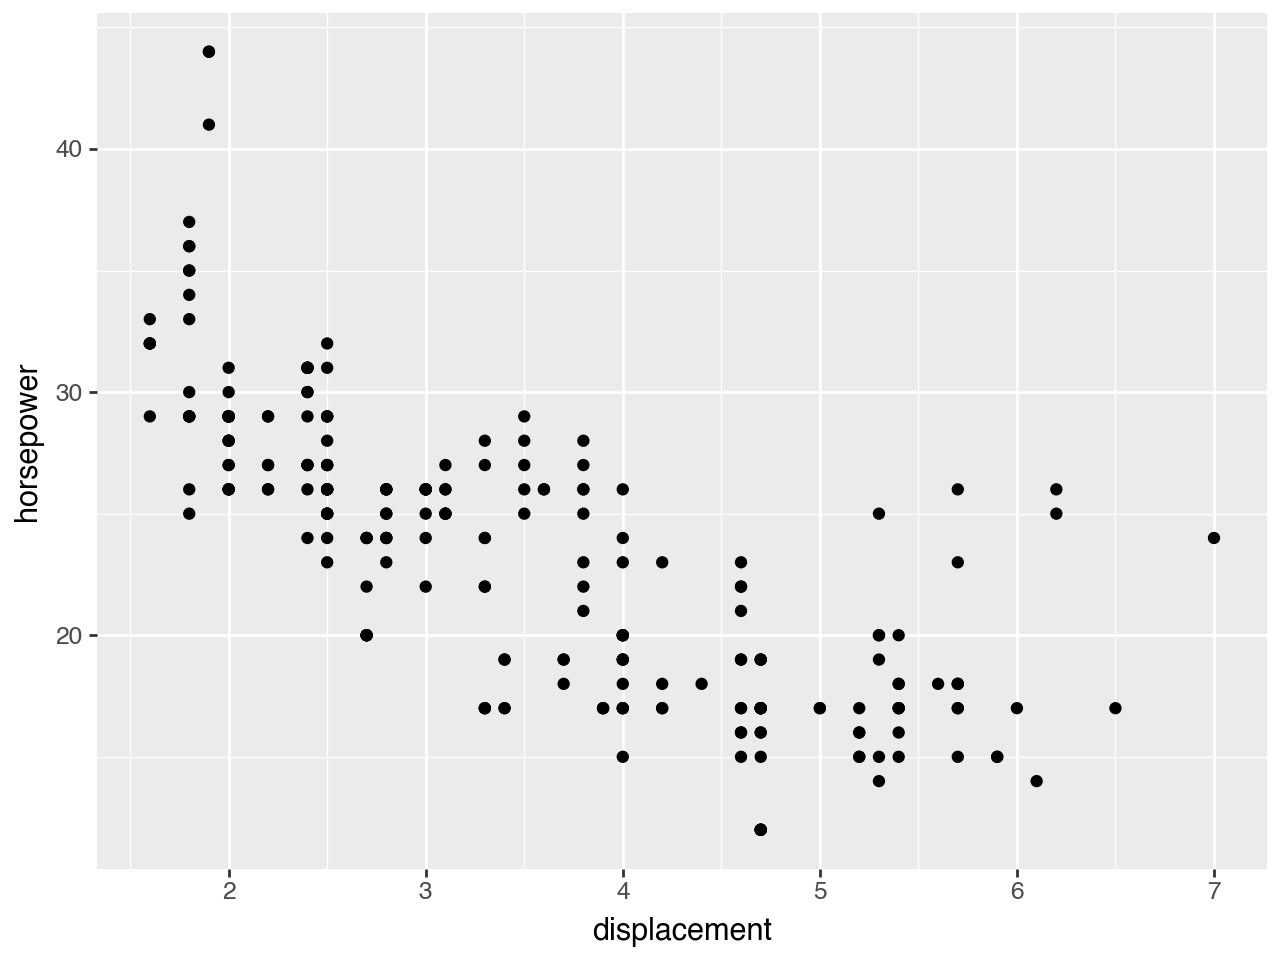

In [3]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + labs(x="displacement", y="horsepower")
)

Facet a discrete variable into rows:

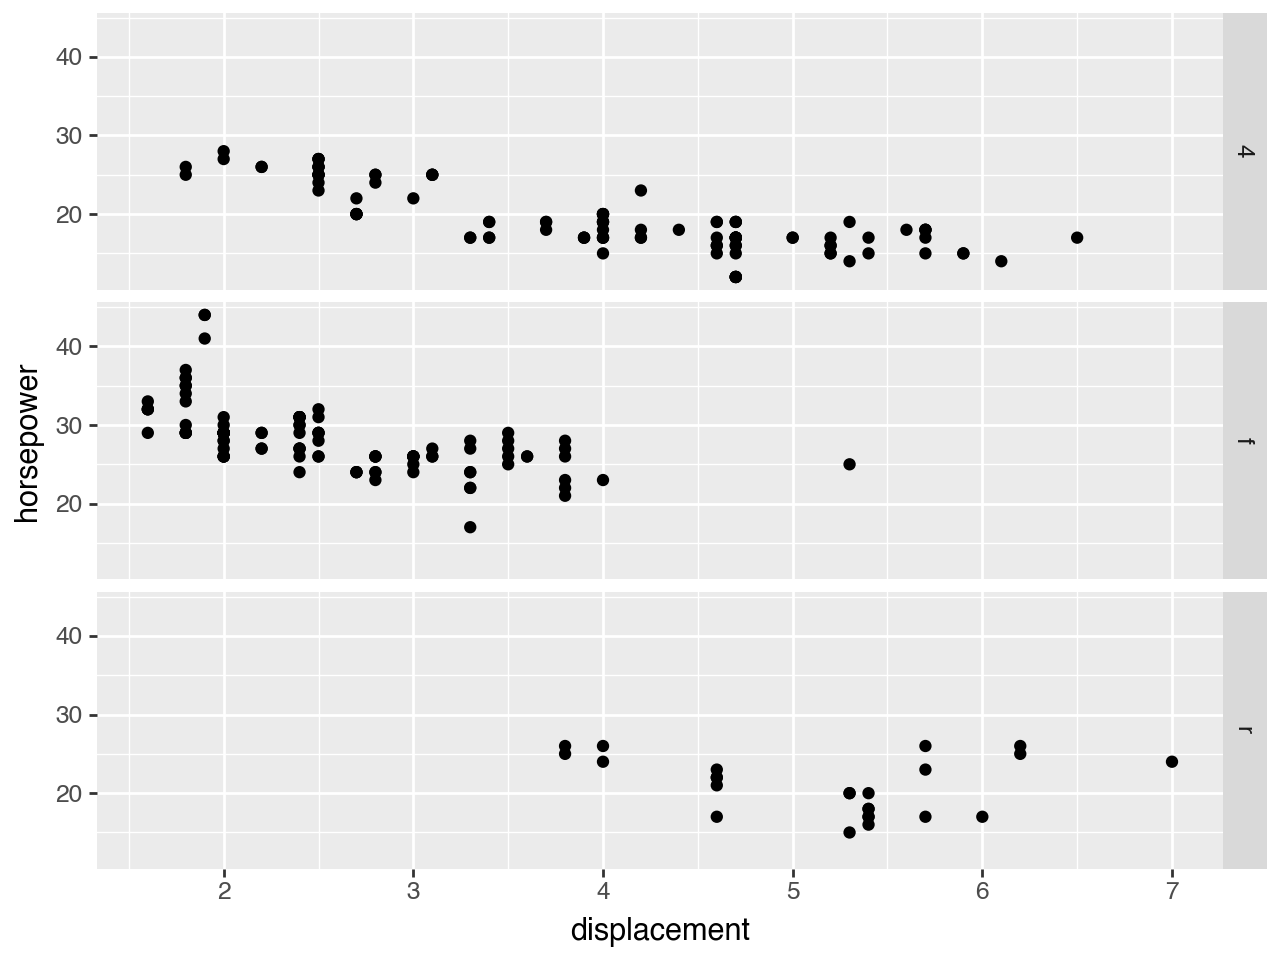

In [4]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid("drv")
    + labs(x="displacement", y="horsepower")
)

Facet a discrete variable into columns:

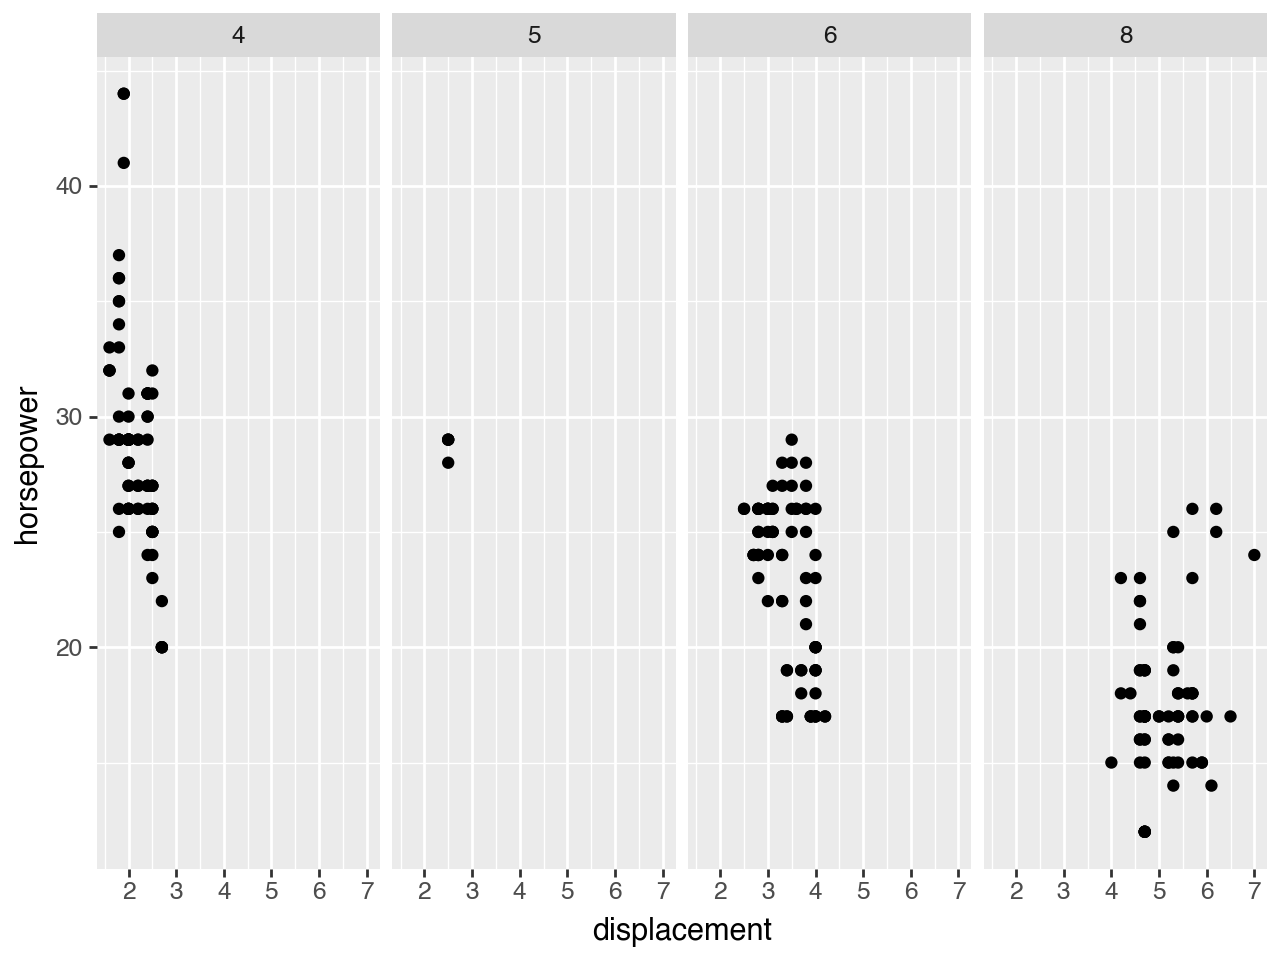

In [5]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid(cols="cyl")
    + labs(x="displacement", y="horsepower")
)

Facet two discrete variables into rows and columns:

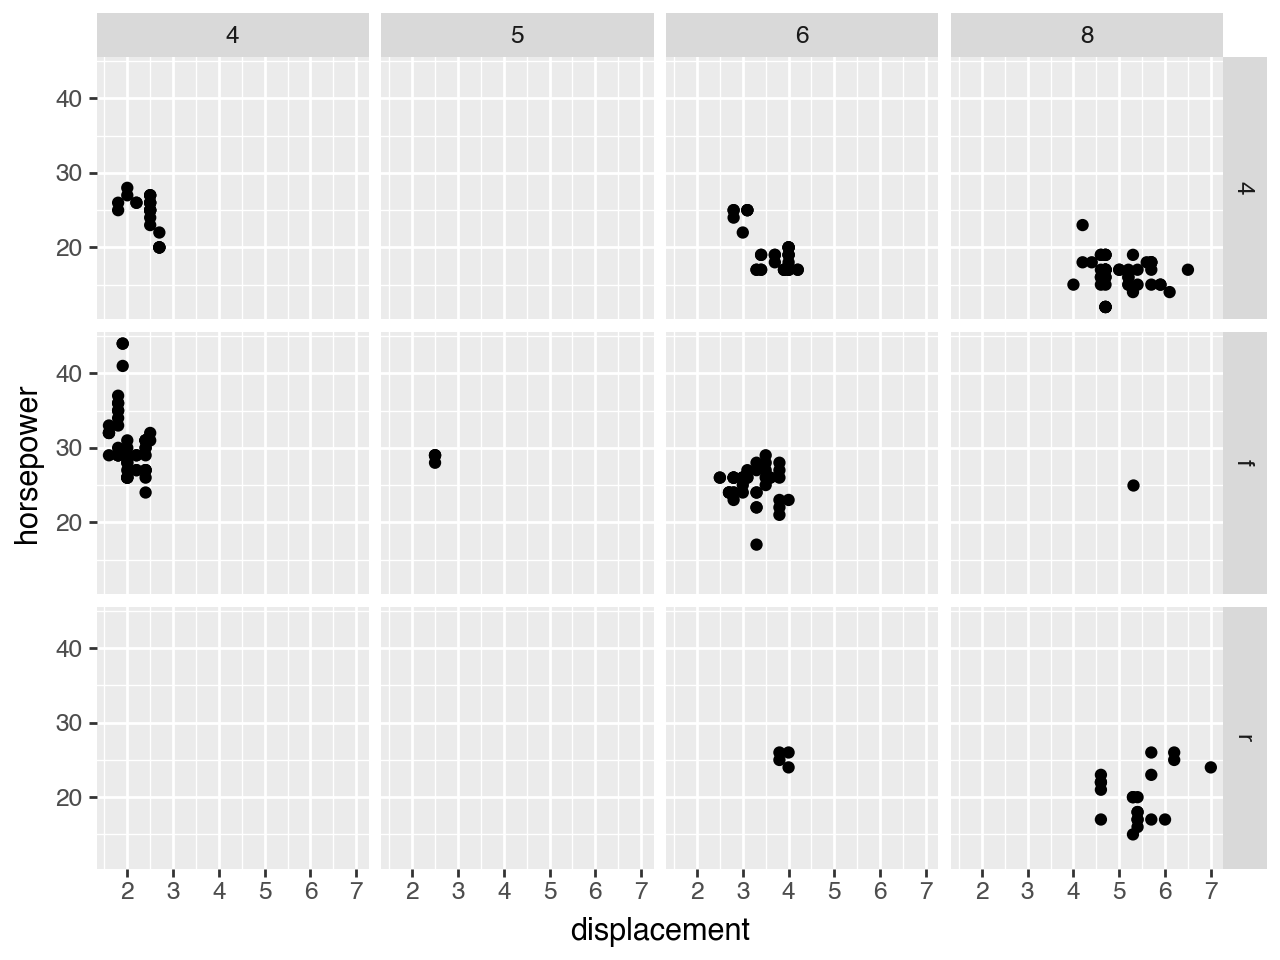

In [6]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid("drv", "cyl")
    + labs(x="displacement", y="horsepower")
)

To change the plot order of the rows or columns in the facet grid, use a
categorical and reorder the levels of the faceting variable in the data.

In [7]:
# Convert to categorical and re-order categories
mpg["drv"] = mpg["drv"].astype("category").cat.reorder_categories(["f", "r", "4"])

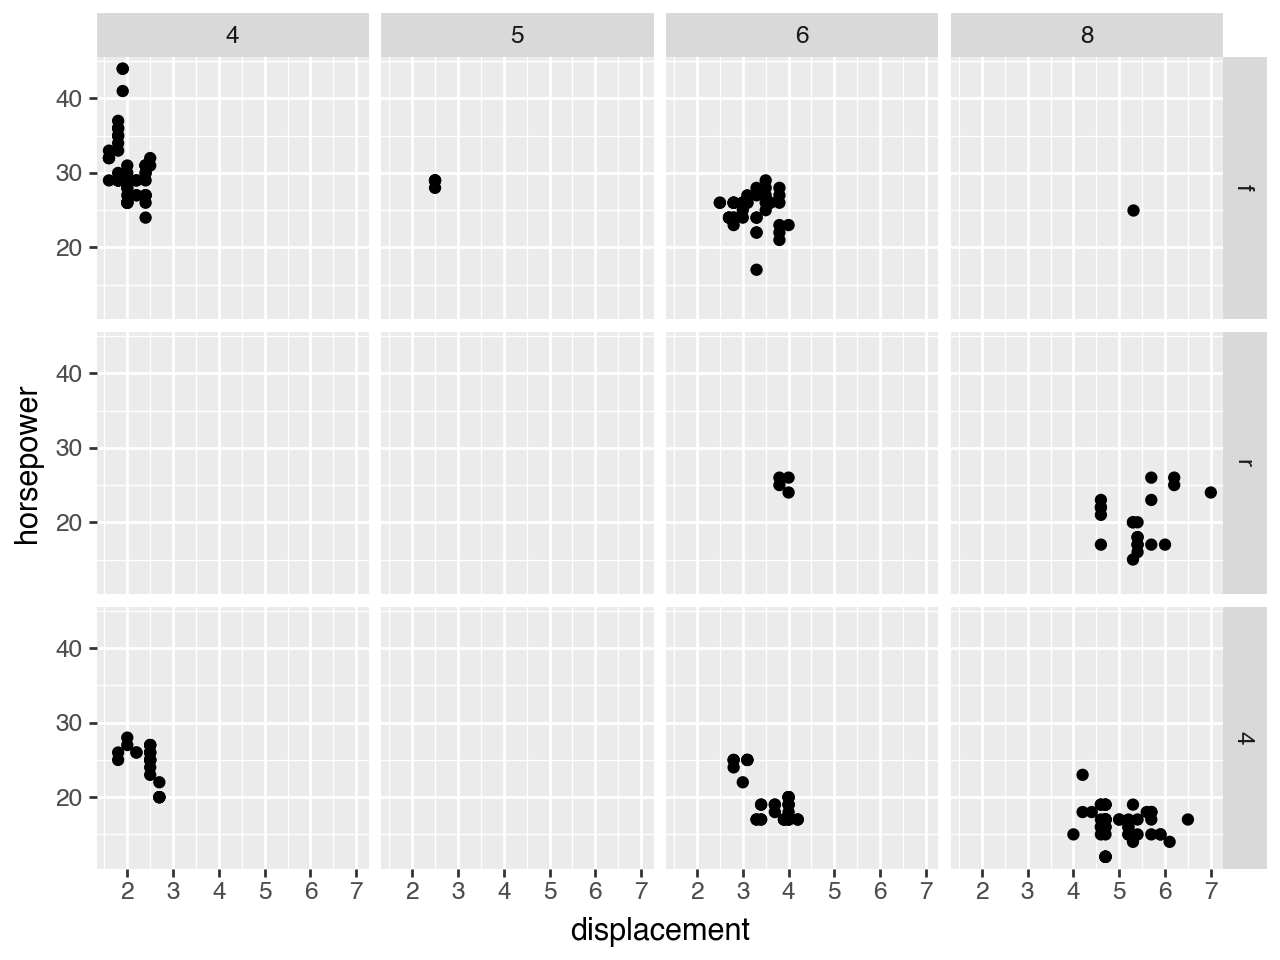

In [8]:
# facet plot with reorded drv category
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid("drv", "cyl")
    + labs(x="displacement", y="horsepower")
)

You can choose if the scale of x- and y-axes are fixed or variable by
using the `scales` argument within the `facet_grid()` command:

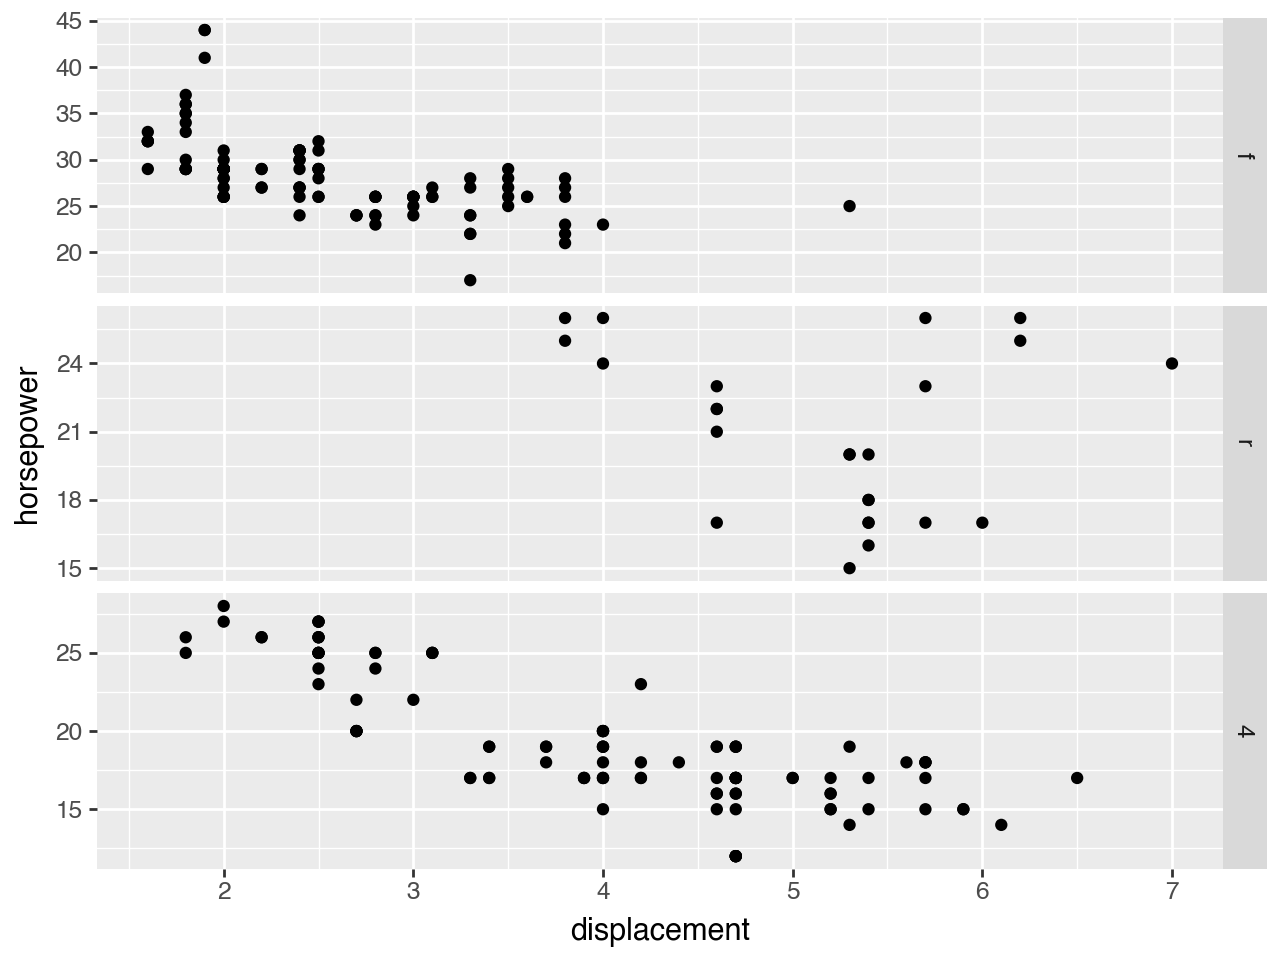

In [9]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid("drv", scales="free")
    + labs(x="displacement", y="horsepower")
)

You can add additional information to your facet labels, by using the
`labeller` argument within the `facet_grid()` command. Below we use
`labeller = 'label_both'` to include the column name in the facet label.

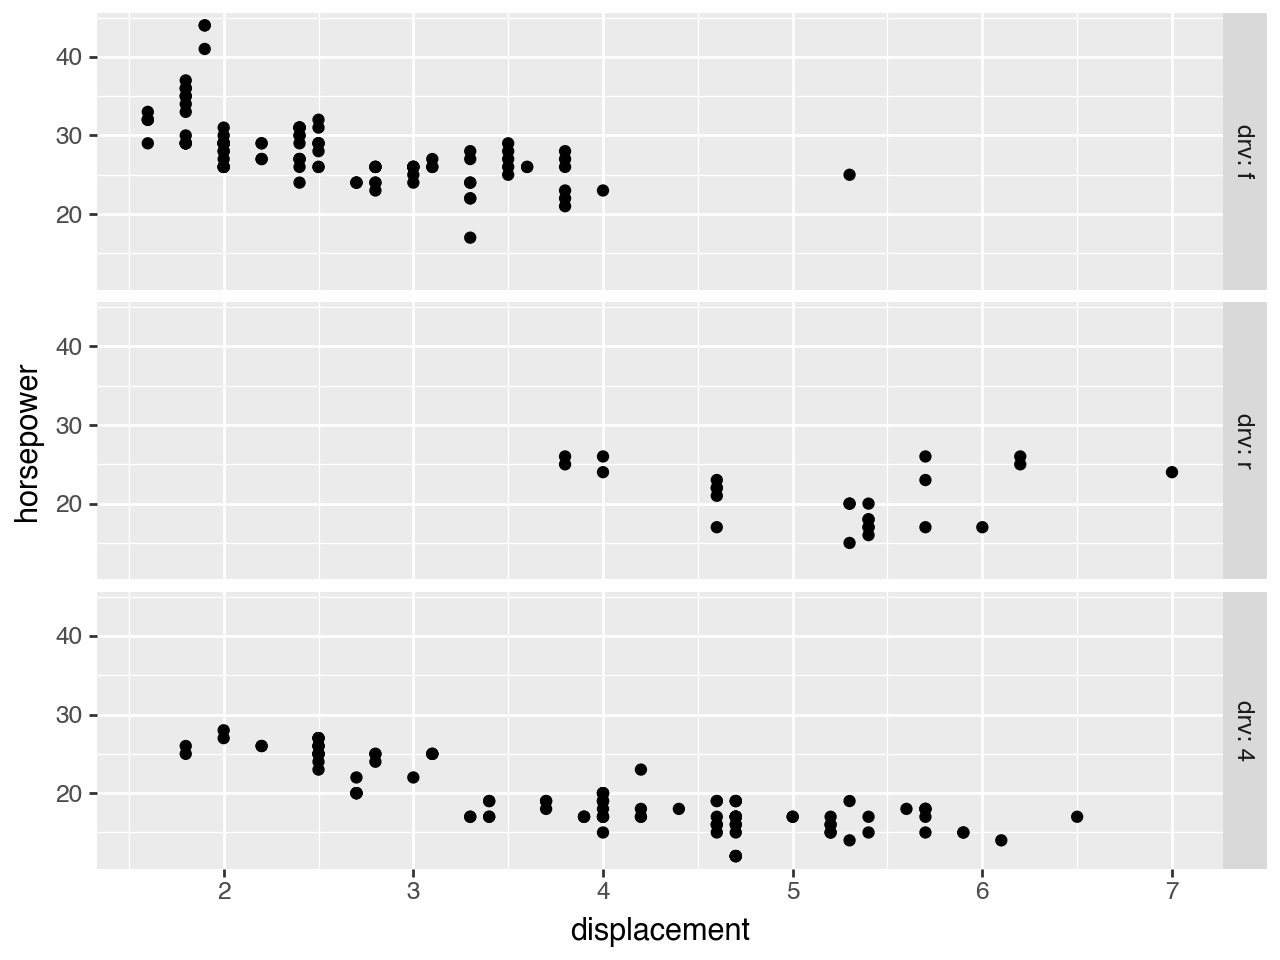

In [10]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid("drv", labeller="label_both")
    + labs(x="displacement", y="horsepower")
)

You can add two discrete variables to a facet:

In [11]:
# add additional column for plotting exercise
mpg["transmission"] = mpg["trans"].map(
    lambda x: "auto" if "auto" in x else "man" if "man" in x else ""
)

In [12]:
# inspect new column transmission which identifies cars as having an automatic or manual transmission
mpg.head()

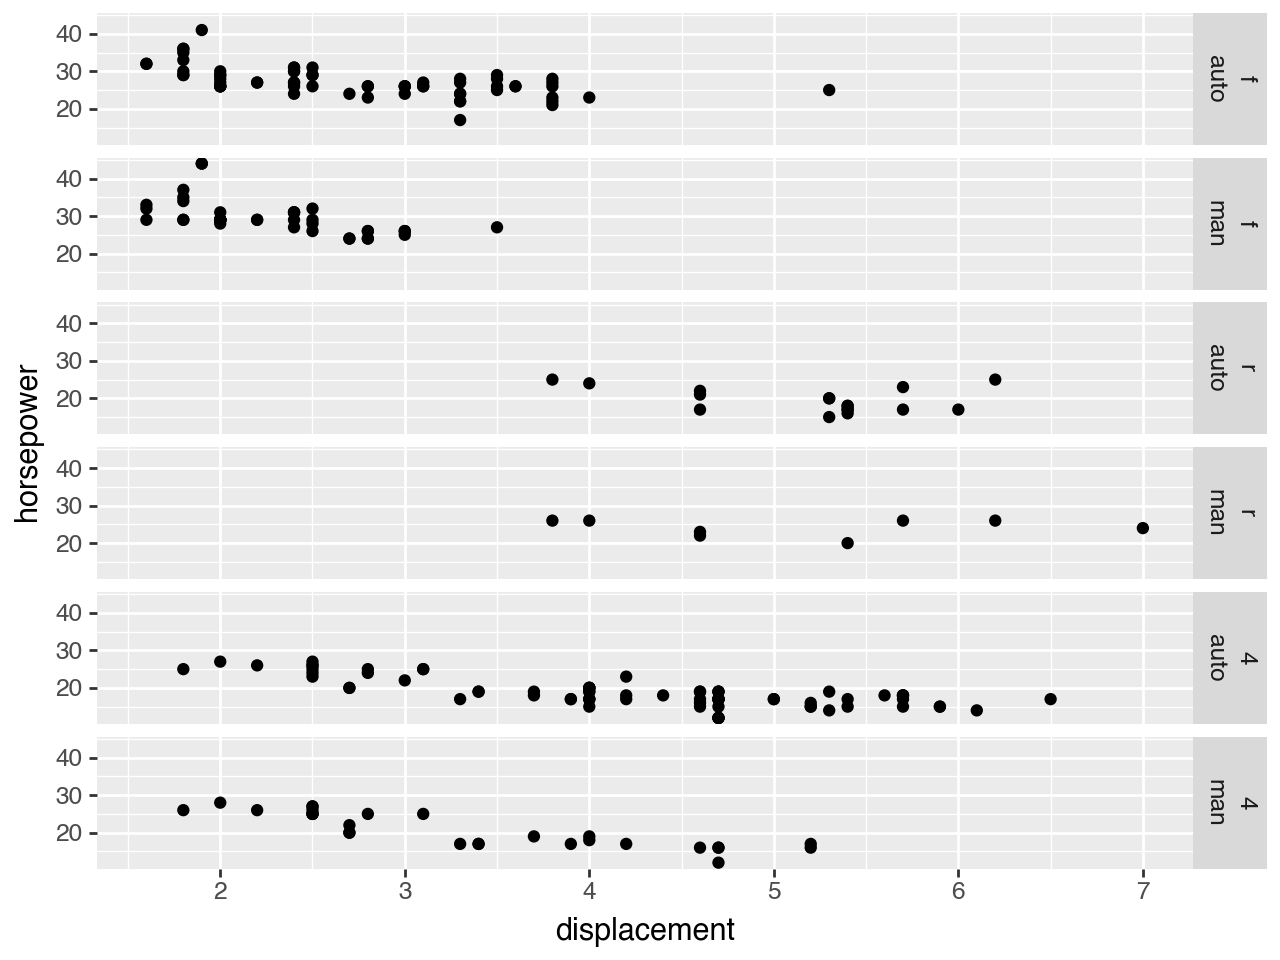

In [13]:
# facet plot with two variables on one facet
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_grid(["drv", "transmission"])  # use a list to add additional faceting variables
    + labs(x="displacement", y="horsepower")
)

Facet labels can be rotated to make them easier to read using
`strip_text_y = element_text(angle = 0)` for row labels within the
`theme()` command (use `strip_text_x = element_text(angle = 0)` for
column labels).

If the labels do not fit in the strip, adjust the width of the strip
using `strip_background_y` for rows (use `strip_background_x` for
columns). You may also need to adjust the text position so it fits in
the strip: adjust the horizontal text position in the strip by
specifying `ha` in `element_text()`(specify `va` in `element_text()` to
adjust the vertical text position).

You can also change the colour of the strip by specifying `color` in
`element_text()` .

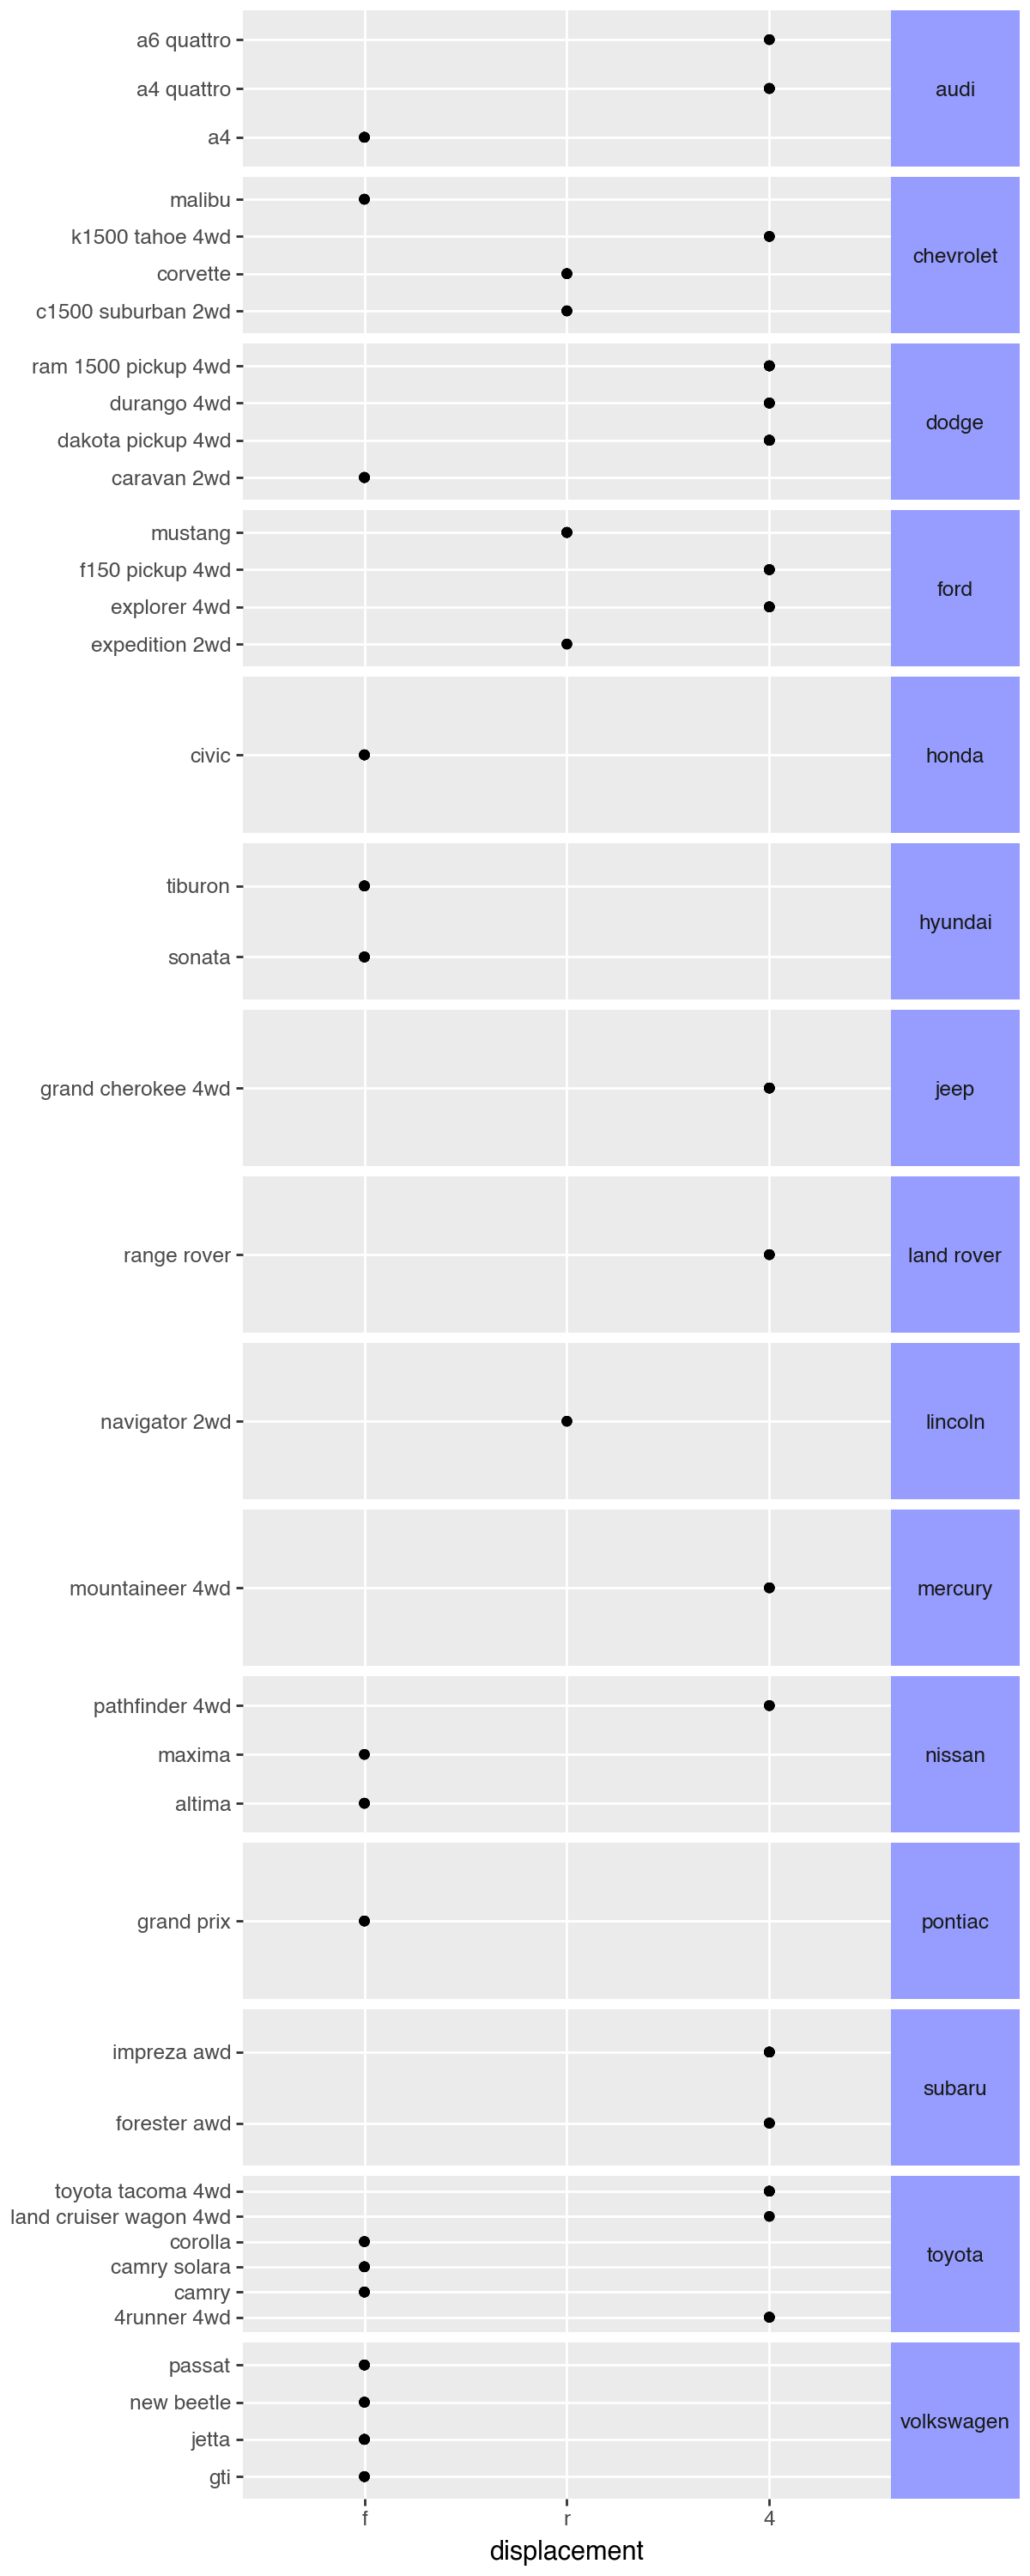

In [14]:
(
    ggplot(mpg, aes(x="drv", y="model"))
    + geom_point()
    + facet_grid("manufacturer", scales="free")
    + theme(
        strip_text_y=element_text(angle=0),   # change facet text angle
        strip_background_y=element_rect(fill="#969dff"),   # change background colour of facet background
        figure_size=(6, 15),  # adjust width & height of figure to fit y-axis
    )
    + labs(x="displacement", y="")
)